# Taylor Problem 16.14 version B

We'll plot at various times a wave $u(x,t)$ that is defined by its initial shape at $t=0$ from $x=0$ to $x=L$, using a Fourier sine series to write the result at a general time t: 

$\begin{align}
  u(x,t) = \sum_{n=1}^{\infty} B_n \sin(k_n x)\cos(\omega_n t)
  \;,
\end{align}$

with $k_n = n\pi/L$ and $\omega_n = k_n c$, where $c$ is the wave speed.   Here the coefficients are given by

$\begin{align}
  B_n = \frac{2}{L}\int_0^L u(x,0) \sin\frac{n\pi x}{L} \, dx
  \;.
\end{align}$

* Created 28-Mar-2019. Last revised 04-Apr-2019 by Dick Furnstahl (furnstahl.1@osu.edu).
* This version sums over all n integers, even and odd.

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

First define functions for the $t=0$ wave function form (here a triangle) and for the subsequent shape at any time $t$ based on the wave speed `c_wave`.

In [5]:
class uTriangular():
    """
      documentation
    """
    def __init__(self, x_pts, num_terms=20, c_wave=1., L=1.):
        self.x_pts = x_pts
        self.num_terms = num_terms
        self.c = c_wave
        self.L = L
        
    def B_coeff(self, n):
        """Fourier coefficient for the nth term in the expansion, which is only 
            non-zero if n is odd, or n = 2*m + 1.
        """
        if n % 2 == 1:   # n is odd
            m = (n - 1)/2
            return (-1)**m * 8. / (n * np.pi)**2 
        else:  # n is even
            return 0.
        
    def k(self, n):
        """Wave number for n 
        """
        return n * np.pi / self.L
    
    def u_wave(self, t):
        """Returns the wave from the sum of Fourier components.  
        """
        y_pts = np.zeros(len(self.x_pts))  # define y_pts as the same size as x_pts
        for n in np.arange(0, self.num_terms):  
            y_pts += self.B_coeff(n) * np.sin(self.k(n) * self.x_pts) \
                      * np.cos(self.k(n) * self.c * t) 
        return y_pts

First look at the initial ($t=0$) wave form.

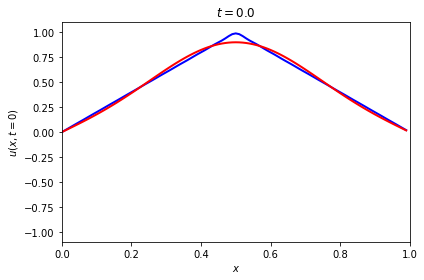

In [6]:
L = 1.
num_n = 40
c_wave = 1
omega_1 = np.pi * c_wave / L
tau = 2.*np.pi / omega_1

# Set up the array of x points (whatever looks good)
x_min = 0.
x_max = L
delta_x = 0.01
x_pts = np.arange(x_min, x_max, delta_x)

u_triangular_1 = uTriangular(x_pts, num_n, c_wave, L)
u_triangular_2 = uTriangular(x_pts, num_n/8, c_wave, L)

# Make a figure showing the initial wave.
t_now = 0.

fig = plt.figure(figsize=(6,4), num='Standing wave')
ax = fig.add_subplot(1,1,1)
ax.set_xlim(x_min, x_max)
gap = 0.1
ax.set_ylim(-1. - gap, 1. + gap)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(x, t=0)$')
ax.set_title(rf'$t = {t_now:.1f}$')

line, = ax.plot(x_pts, 
                u_triangular_1.u_wave(t_now), 
                color='blue', lw=2)
line2, = ax.plot(x_pts, 
                u_triangular_2.u_wave(t_now), 
                color='red', lw=2)

fig.tight_layout()


Next make some plots at an array of time points.

NameError: name 'u_triangular' is not defined

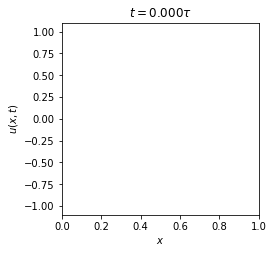

In [10]:
t_array = tau * np.arange(0., 1.125, .125)

fig_array = plt.figure(figsize=(12,12), num='Standing wave')

for i, t_now in enumerate(t_array): 
    ax_array = fig_array.add_subplot(3, 3, i+1)
    ax_array.set_xlim(x_min, x_max)
    gap = 0.1
    ax_array.set_ylim(-1. - gap, 1. + gap)
    ax_array.set_xlabel(r'$x$')
    ax_array.set_ylabel(r'$u(x, t)$')
    ax_array.set_title(rf'$t = {t_now/tau:.3f}\tau$')

    ax_array.plot(x_pts, 
                  u_triangular(x_pts, t_now, num_n, c_wave, L), 
                  color='blue', lw=2)

fig_array.tight_layout()
fig_array.savefig('Taylor_Problem_16p14.png', 
                   bbox_inches='tight')  

Now it is time to animate!

In [ ]:
# Set up the t mesh for the animation.  The maximum value of t shown in
#  the movie will be t_min + delta_t * frame_number
t_min = 0.   # You can make this negative to see what happens before t=0!
t_max = 2.*tau
delta_t = t_max / 100.
t_pts = np.arange(t_min, t_max + delta_t, delta_t)

We use the cell "magic" `%%capture` to keep the figure from being shown here.  If we didn't the animated version below would be blank.

In [ ]:
%%capture

fig_anim = plt.figure(figsize=(6,3), num='Triangular wave')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
gap = 0.1
ax_anim.set_ylim(-1. - gap, 1. + gap)

# By assigning the first return from plot to line_anim, we can later change
#  the values in the line.
line_anim, = ax_anim.plot(x_pts, 
                          u_triangular(x_pts, t_min, num_n, c_wave, L), 
                          color='blue', lw=2)

fig_anim.tight_layout()

In [ ]:
def animate_wave(i):
    """This is the function called by FuncAnimation to create each frame,
        numbered by i.  So each i corresponds to a point in the t_pts
        array, with index i.
    """
    t = t_pts[i]
    y_pts = u_triangular(x_pts, t, num_n, c_wave, L) 

    line_anim.set_data(x_pts, y_pts)  # overwrite line_anim with new points
    return (line_anim,)   # this is needed for blit=True to work

In [ ]:
frame_interval = 80.  # time between frames
frame_number = 101    # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_wave, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)


In [ ]:
HTML(anim.to_jshtml())      # animate using javascript
